In [24]:
import networkx as nx
from operator import truediv
from scipy.sparse import csr_matrix
import math
import random
from collections import Counter
from itertools import combinations
from collections import defaultdict
from tqdm import tqdm


In [25]:
mygraph = nx.read_gml('sem5.gml',label='id')


In [26]:
e=list(mygraph.edges())
L=list(mygraph.nodes())
edge_list = list(combinations(L, 2))
R1=[l[0] for l in edge_list]
R2=[l[1] for l in edge_list]
r1 = [lis[0] for lis in e]
r2 = [lis[1] for lis in e]

In [27]:
def DegreeofN(G,l):
    F2=[]
    for i in range(len(G.nodes)):
        a=mygraph.degree[l[i]]
        F2.append(a)
    return F2
F1=DegreeofN(mygraph,L)
print(F1)

[9, 8, 4, 15, 13, 10, 11, 7, 7, 6, 10, 10, 16, 2, 16, 8, 10, 5, 8, 17, 5, 14, 17, 11, 3, 5, 18, 0, 11, 16, 8, 12, 5, 18, 15, 17, 15, 8, 10, 7, 8, 5, 2, 2, 1, 16, 20, 23, 17, 17, 5, 7, 2, 2, 6, 2, 5, 0, 0, 0, 0, 0, 0, 6, 14, 9, 12, 22, 12, 7, 12, 0, 9, 9, 6, 15, 5, 11, 10, 17, 10, 2, 27, 13, 10, 5, 13, 14, 7, 10, 0, 7, 7, 3, 0, 5, 0, 7, 5, 0, 5, 17, 15, 14, 13, 14, 7, 12, 6, 8, 0, 9, 3, 7, 11, 0, 4, 4, 4, 9, 2, 0, 0, 0, 0, 0, 0, 0]


In [28]:
# Networkx appears not to implement their eigenvector centrality algorithm for MultiDiGraph objects, so you'd have to convert your object like:
G2 = nx.DiGraph(mygraph)
def Eigen_Centrality(G2):
    centrality = nx.eigenvector_centrality(G2, max_iter=1000)
    return list(centrality.values())
F4=Eigen_Centrality(G2)

In [29]:
def Betweeness(G):
    betweeness = nx.betweenness_centrality(G)
    return list(betweeness.values())
F5=Betweeness(mygraph)

In [30]:
G2 = nx.DiGraph(mygraph)
def Clustering(G):
    clustering_coeff =nx.clustering(G)
    return list(clustering_coeff.values())
F6=Clustering(G2)

Node Conductivity
Betweenness divided by Degree: which nodes can reach the most nodes in the different parts of the network faster with the least connections. Nodes with a high conductivity will tend to be better connected to the different distinct groups of nodes. They are reaching for global connections instead of the local ones. 

In [31]:
NC = []
def nodeConductivity(l):
    count=0
    for i in range(0, len(l)):
        if F1[i] == 0:
            NC.append(0)
        else:
            NC.append(F5[i]/F1[i])
        count=count+1
    return NC
F7=nodeConductivity(L)
print(len(F7))

128


Node Locality
Degree squared divided by Betweenness: Local influencers with the least global connections. Nodes with high locality measure will tend to have more connections within their local group of nodes.

In [32]:
def nodeLocality(l):
    NL=[]
    for i in range(len(l)):
        count=0
        if F1[i] == 0:
            NL.append(0)
        else:
            temp=math.sqrt(F1[i])
            NL.append(F5[i]/temp)
        count=count+1
    return NL
F8=nodeLocality(L)
print(len(F8))

128


In [33]:
print(F1)

[9, 8, 4, 15, 13, 10, 11, 7, 7, 6, 10, 10, 16, 2, 16, 8, 10, 5, 8, 17, 5, 14, 17, 11, 3, 5, 18, 0, 11, 16, 8, 12, 5, 18, 15, 17, 15, 8, 10, 7, 8, 5, 2, 2, 1, 16, 20, 23, 17, 17, 5, 7, 2, 2, 6, 2, 5, 0, 0, 0, 0, 0, 0, 6, 14, 9, 12, 22, 12, 7, 12, 0, 9, 9, 6, 15, 5, 11, 10, 17, 10, 2, 27, 13, 10, 5, 13, 14, 7, 10, 0, 7, 7, 3, 0, 5, 0, 7, 5, 0, 5, 17, 15, 14, 13, 14, 7, 12, 6, 8, 0, 9, 3, 7, 11, 0, 4, 4, 4, 9, 2, 0, 0, 0, 0, 0, 0, 0]


In [42]:
print(F5)

[0.09189672807949423, 0.009536450648674704, 0.005999250093738282, 0.004901358872535376, 0.027652666245493486, 0.005697204516102149, 0.06441936668016, 0.0013325439890069235, 0.0022659369959707417, 0.0169769185282403, 0.01778588257677479, 0.02249373990723332, 0.1488431964950923, 0.0, 0.027653481336725443, 0.0004065439760977819, 0.0064116275415496676, 2.043013854037476e-05, 0.13556037807774068, 0.019145123489621423, 3.8136258608699554e-05, 0.017747374660482994, 0.13910492587716639, 0.020199220264033365, 0.007909062774079647, 0.03735812089857447, 0.049441200863363795, 0.0, 0.11376615885896642, 0.04204343566753192, 0.0, 0.006245635977608822, 0.0011513712301113874, 0.011058999898072684, 0.05389206484105056, 0.010701944685374425, 0.008270289509675439, 0.03623927328415192, 0.0024292190882873265, 0.019572933950105897, 0.02442554217019908, 0.011748531433570802, 0.0, 0.0, 0.0, 0.009973514944109382, 0.011030529613646435, 0.01388159341056558, 0.04697164197073084, 0.010719631826426256, 0.00115137123

In [44]:
node_attributes = list(mygraph.nodes[1].values())[10:]
node_attributes.remove('A')
print(node_attributes)
s= sum(node_attributes)
print(s)

[48, 93, 95, 46, 85, 89, 48, 78, 87, 37, 71, 73, 40, 66, 73, 46, 49, 71, 44, 78, 83, 45, 90, 90, 82, 47, 87, 91, 46, 90, 91, 45, 80, 85, 47, 82, 88, 48, 75, 86, 40, 44, 62, 36, 64, 68, 46, 64, 78, 81, 47, 82, 88, 43, 75, 81, 46, 88, 90, 45, 71, 81, 46, 76, 84, 85, 42, 83, 84, 40, 88, 84, 49, 93, 96, 44, 71, 80, 47, 83, 89, 87]
5666


In [45]:
print(len(L))

128


In [68]:
print(mygraph.nodes[126])

{'name': '127', 'Gender': 'male', 'LateralEntry': 0, 'Backlog': 0, 'ProjectPartner3rdSem': '0', 'ProjectPartner4thSem': 0, 'PCP': 0, 'TFCS': 0, 'DMS': 0, 'DS': 0, 'Maths1CIE': 0, 'Maths1SEE': 0, 'Maths1Final': 0, 'ChemCIE': 0, 'ChemSEE': 0, 'ChemFinal': 0, 'BEECIE': 0, 'BEESEE': 0, 'BEEFinal': 0, 'EEDCIE': 0, 'EEDSEE': 0, 'EEDFinal': 0, 'ENMCIE': 0, 'ENMSEE': 0, 'ENMFinal': 0, 'Colab2CIE': 0, 'Colab2SEE': 0, 'Colab2Final': 0, 'EYSCIE': 0, 'EYSSEE': 0, 'EYSFinal': 0, 'CIPCIE': 0, 'CIPSEE': 0, 'CIPFinal': 0, 'X1stSemPercentage': 0, 'Maths2CIE': 0, 'Maths2SEE': 0, 'Maths2Final': 0, 'PHYCIE': 0, 'PHYSEE': 0, 'PHYFinal': 0, 'EEECIE': 0, 'EEESEE': 0, 'EEEFinal': 0, 'EMECIE': 0, 'EMESEE': 0, 'EMEFinal': 0, 'CCPCIE': 0, 'CCPSEE': 0, 'CCPFinal': 0, 'Colab1CIE': 0, 'Colab1SEE': 0, 'Colab1Final': 0, 'BIECIE': 0, 'BIESEE': 0, 'BIEFinal': 0, 'PDCCIE': 0, 'PDCSEE': 0, 'PDCFinal': 0, 'X2ndSemPercentage': 0, 'Section': 'B', 'PCPCIE': 0, 'PCPSEE': 0, 'PCPFinal': 0, 'TFCCIE': 0, 'TFCSEE': 0, 'TFCFinal':

In [70]:
print(node_attributes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [72]:
def avg(lst):
    S = sum(lst)
    l=len(lst)
    average =S/l
    return average
percent=[]

for i in range(len(L)):
    node_attributes = list(mygraph.nodes[i].values())[10:]
    del node_attributes[50]
    percent.append(avg(node_attributes))
print(percent)

[59.96341463414634, 69.09756097560975, 50.329268292682926, 59.78048780487805, 40.78048780487805, 60.53658536585366, 73.82926829268293, 60.58536585365854, 68.54878048780488, 55.048780487804876, 42.18292682926829, 70.14634146341463, 75.97560975609755, 38.52439024390244, 56.68292682926829, 44.146341463414636, 60.68292682926829, 51.90243902439025, 56.8780487804878, 62.8780487804878, 58.6219512195122, 66.6219512195122, 67.42682926829268, 52.68292682926829, 39.19512195121951, 73.8780487804878, 56.02439024390244, 59.951219512195124, 66.63414634146342, 49.1219512195122, 47.15853658536585, 56.13414634146341, 63.292682926829265, 64.96341463414635, 62.91463414634146, 67.70731707317073, 60.390243902439025, 63.5, 51.19512195121951, 67.70731707317073, 71.53658536585365, 58.69512195121951, 59.78048780487805, 49.292682926829265, 51.0, 43.74390243902439, 62.65853658536585, 42.96341463414634, 45.28048780487805, 64.85365853658537, 59.15853658536585, 28.121951219512194, 15.390243902439025, 16.817073170731

In [59]:
node_attributes = list(mygraph.nodes[1].values())[10:]
print(node_attributes.index('A'))
del node_attributes[50]
print(node_attributes)

50
[48, 93, 95, 46, 85, 89, 48, 78, 87, 37, 71, 73, 40, 66, 73, 46, 49, 71, 44, 78, 83, 45, 90, 90, 82, 47, 87, 91, 46, 90, 91, 45, 80, 85, 47, 82, 88, 48, 75, 86, 40, 44, 62, 36, 64, 68, 46, 64, 78, 81, 47, 82, 88, 43, 75, 81, 46, 88, 90, 45, 71, 81, 46, 76, 84, 85, 42, 83, 84, 40, 88, 84, 49, 93, 96, 44, 71, 80, 47, 83, 89, 87]


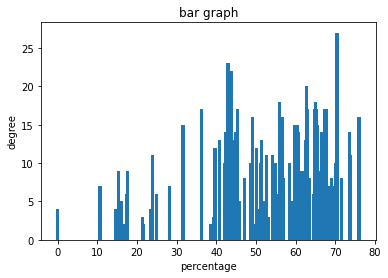

In [60]:
import matplotlib.pyplot as plt

# Plot line graph
plt.bar(percent, F1)

# Add labels and title
plt.xlabel('percentage')
plt.ylabel('degree')
plt.title('bar graph')

# Show plot
plt.show()


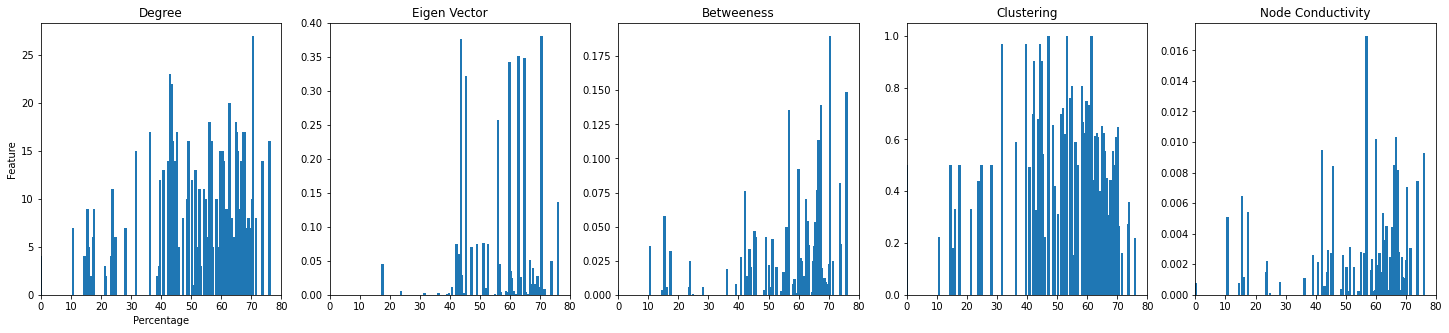

<Figure size 432x288 with 0 Axes>

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# generate some data
x = percent
y1 = F1
y2 = F4
y3 = F5
y4 = F6
y5 = F7
y6 = F8

# create a figure and 5 subplots
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
axs[0].bar(x, y1)
axs[1].bar(x, y2)
axs[2].bar(x, y3)
axs[3].bar(x, y4)
axs[4].bar(x, y5)
# axs[5].bar(x, y6)
# Set titles and axis labels for the subplots
axs[0].set_title('Degree')
axs[1].set_title('Eigen Vector')
axs[2].set_title('Betweeness')
axs[3].set_title('Clustering')
axs[4].set_title('Node Conductivity')
# axs[5].set_title('Node locality')
axs[0].set_xlabel('Percentage')
axs[0].set_ylabel('Feature')
axs[0].set_xlim(0, 80)
axs[1].set_xlim(0, 80)
axs[2].set_xlim(0, 80)
axs[3].set_xlim(0, 80)
axs[4].set_xlim(0, 80)

# Show the plot
plt.show()


# adjust the layout
plt.tight_layout()

# show the plot
plt.show()


In [62]:
name =mygraph.nodes[1]['Section']

In [63]:
print(len(F7))

128


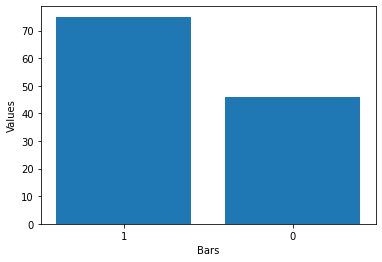

In [75]:
from matplotlib import pyplot

# Define the data
data = [75, 46]

# Define the x-axis labels
labels = ['1', '0']

# Create the bar plot
pyplot.bar(labels, data)

# Add labels
pyplot.xlabel("Bars")
pyplot.ylabel("Values")

# Show the plot
pyplot.show()
